# Qredo transaction activity - Transaction counts

#### Maria Silva, June 2023

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

In [2]:
file = os.path.realpath("../data/agg_tx.csv")
daily_df = pd.read_csv(file)
daily_df["day"] = pd.to_datetime(daily_df["day"])
daily_df["year_month"] = daily_df["day"].dt.year.astype("str") + "-" + daily_df["day"].dt.month.astype("str")
daily_df.head()

,day,tx_group,tx_type,tx_count,year_month
0,2020-09-01,ql2_others,deposit,3,2020-9
1,2020-09-01,ql2_others,ql2_internal,3,2020-9
2,2020-09-01,ql2_others,withdraw,3,2020-9
3,2020-09-02,ql2_others,deposit,3,2020-9
4,2020-09-02,ql2_others,ql2_internal,8,2020-9


In [3]:
daily_df["day"].agg(["min", "max"])

min   2020-09-01
max   2023-05-26
Name: day, dtype: datetime64[ns]

In [4]:
temp_df = daily_df.groupby("tx_group")["tx_count"].sum()/daily_df["tx_count"].sum()
temp_df.sort_values(ascending=False)

tx_group
ql2_QRDO      0.861137
mmi           0.121623
ql2_others    0.017239
Name: tx_count, dtype: float64

In [5]:
temp_df = daily_df.groupby("tx_type")["tx_count"].sum()/daily_df["tx_count"].sum()
temp_df.sort_values(ascending=False)

tx_type
staking         0.425088
vestingOut      0.180003
vestingIn       0.178216
mmi             0.121623
withdraw        0.040523
ql2_internal    0.036565
deposit         0.017980
Name: tx_count, dtype: float64

In [6]:
group = daily_df.groupby(["year_month", "tx_group", "tx_type"])
monthly_df = group[["tx_count"]].sum()
monthly_df["day"] = group["day"].first()
monthly_df = monthly_df.reset_index()

monthly_df.head()

,year_month,tx_group,tx_type,tx_count,day
0,2020-10,ql2_others,deposit,20,2020-10-01
1,2020-10,ql2_others,ql2_internal,27,2020-10-01
2,2020-10,ql2_others,withdraw,13,2020-10-05
3,2020-11,ql2_others,deposit,100,2020-11-10
4,2020-11,ql2_others,ql2_internal,75,2020-11-04


## Transaction counts - Daily

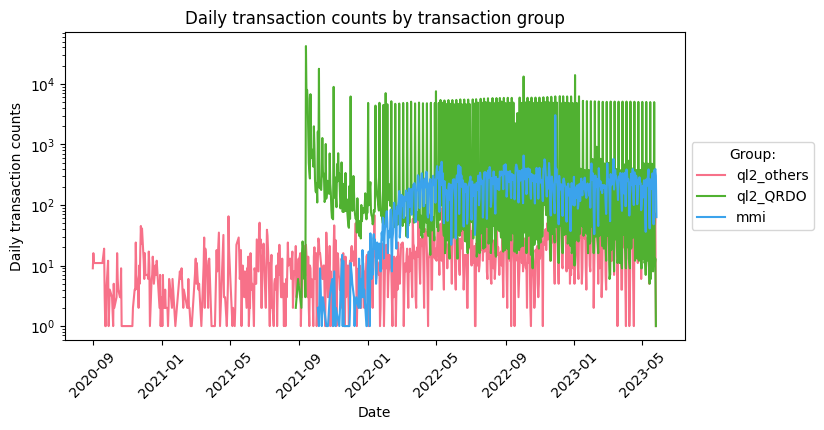

In [7]:
temp_df = daily_df.groupby(["day", "tx_group"])["tx_count"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count",hue="tx_group", palette="husl")
plt.ylabel("Daily transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Daily transaction counts by transaction group")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Group:")
plt.show()

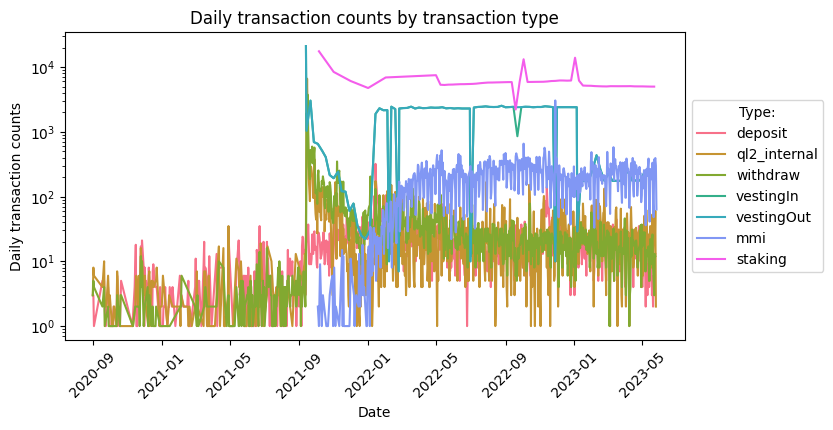

In [8]:
temp_df = daily_df.groupby(["day", "tx_type"])["tx_count"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count",hue="tx_type", palette="husl")
plt.ylabel("Daily transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Daily transaction counts by transaction type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Type:")
plt.show()

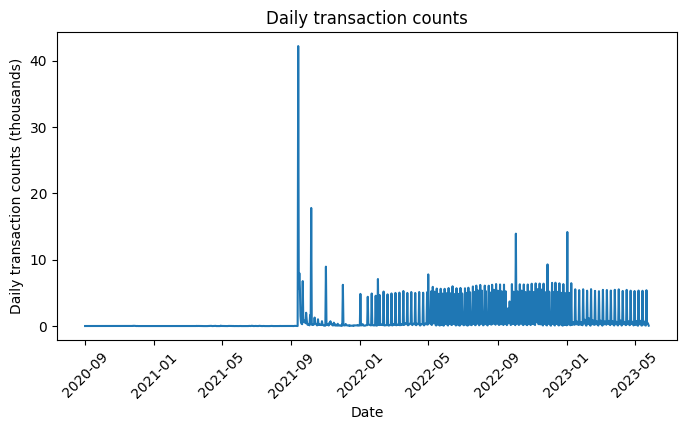

In [9]:
temp_df = daily_df.groupby("day")["tx_count"].sum().reset_index()
temp_df["tx_count"] = temp_df["tx_count"]/1000

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count")
plt.ylabel("Daily transaction counts (thousands)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.title("Daily transaction counts")
plt.show()

In [10]:
daily_df.groupby(["tx_group", "tx_type"])["tx_count"].agg(["mean", "std"])

mean          std
tx_group   tx_type                               
mmi        mmi            190.268116   173.395127
ql2_QRDO   deposit         15.926400    19.620053
           ql2_internal    45.214521   288.276893
           staking       6017.803279  2210.089688
           vestingIn     1637.223404  2295.296758
           vestingOut    1653.638298  2295.152183
           withdraw        47.922953   190.071371
ql2_others deposit          7.218912     6.517860
           ql2_internal     7.620438    10.100324
           withdraw         7.136111     6.852373

In [11]:
temp_df = daily_df.groupby(["tx_group", "tx_type"])["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1]).reset_index()
temp_df["quantile"] = temp_df["level_2"]
temp_df.pivot(index=['tx_group', 'tx_type'], columns='quantile', values='tx_count')

quantile                   0.00     0.25    0.50     0.75     1.00
tx_group   tx_type                                                
mmi        mmi              1.0    79.00   186.5   270.00   3047.0
ql2_QRDO   deposit          1.0     7.00    11.0    18.00    313.0
           ql2_internal     1.0     6.25    16.0    31.00   6611.0
           staking       2209.0  5064.00  5539.0  5924.00  17507.0
           vestingIn        7.0   197.25  2288.5  2400.75  21069.0
           vestingOut       7.0   197.25  2289.0  2400.75  21069.0
           withdraw         1.0     9.00    17.0    32.00   3745.0
ql2_others deposit          1.0     3.00     6.0    10.00     51.0
           ql2_internal     1.0     2.00     4.0     9.00     83.0
           withdraw         1.0     2.00     5.0    10.00     53.0

## Transaction counts - Monthly

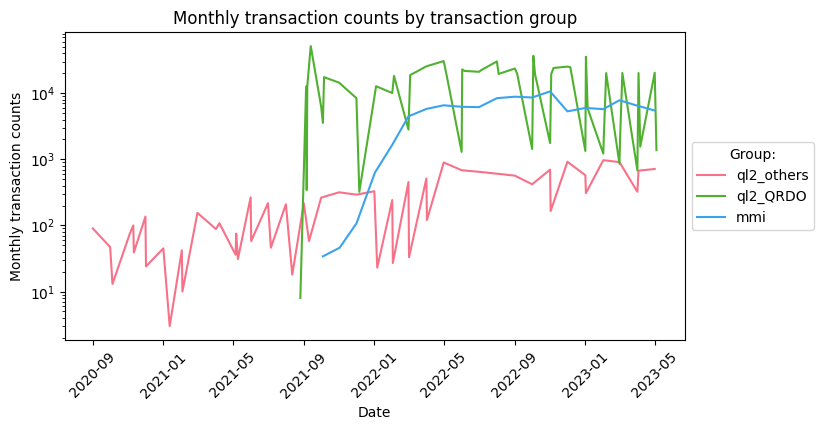

In [12]:
temp_df = monthly_df.groupby(["day", "tx_group"])["tx_count"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count",hue="tx_group", palette="husl")
plt.ylabel("Monthly transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Monthly transaction counts by transaction group")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Group:")
plt.show()

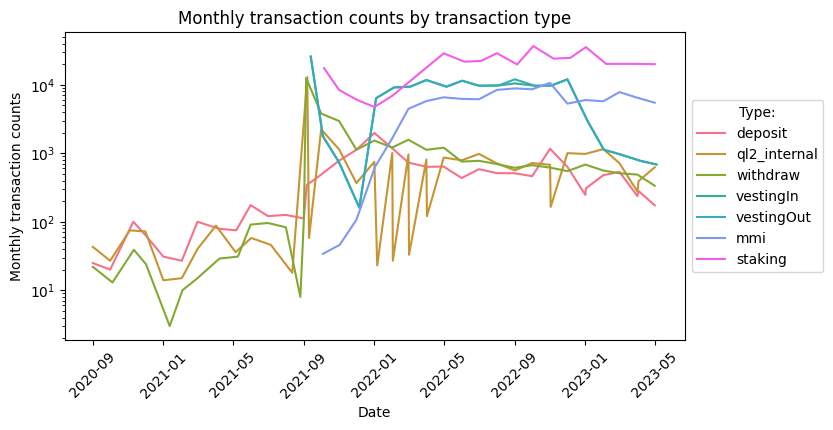

In [13]:
temp_df = monthly_df.groupby(["day", "tx_type"])["tx_count"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count",hue="tx_type", palette="husl")
plt.ylabel("Monthly transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Monthly transaction counts by transaction type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Type:")
plt.show()

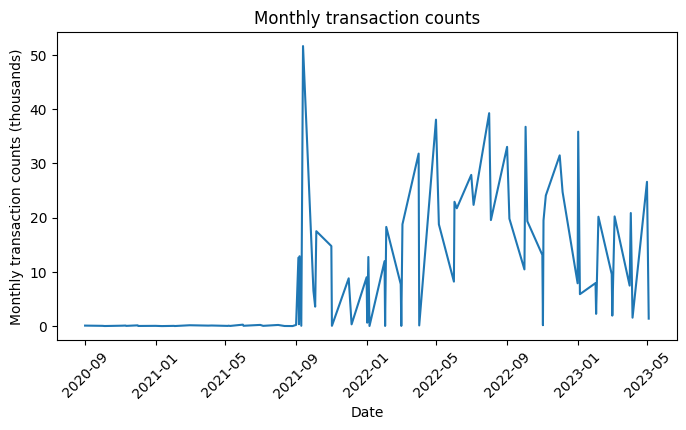

In [14]:
temp_df = monthly_df.groupby("day")["tx_count"].sum().reset_index()
temp_df["tx_count"] = temp_df["tx_count"]/1000

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count")
plt.ylabel("Monthly transaction counts (thousands)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.title("Monthly transaction counts")
plt.show()

In [15]:
monthly_df.groupby(["tx_group", "tx_type"])["tx_count"].agg(["mean", "std"])

mean          std
tx_group   tx_type                                
mmi        mmi            5251.400000  3177.927434
ql2_QRDO   deposit         474.000000   386.701823
           ql2_internal   1304.761905  2683.978053
           staking       20393.666667  9281.776320
           vestingIn      7328.523810  6153.046649
           vestingOut     7402.000000  6201.665389
           withdraw       1357.090909  2666.925033
ql2_others deposit         168.878788   102.518217
           ql2_internal    126.545455   129.912733
           withdraw        155.696970   115.230336

In [16]:
temp_df = monthly_df.groupby(["tx_group", "tx_type"])["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1]).reset_index()
temp_df["quantile"] = temp_df["level_2"]
temp_df.pivot(index=["tx_group", "tx_type"], columns='quantile', values='tx_count')

quantile                   0.00      0.25     0.50      0.75     1.00
tx_group   tx_type                                                   
mmi        mmi             34.0   3763.25   5886.5   6881.00  10653.0
ql2_QRDO   deposit         83.0    248.00    343.0    546.00   1762.0
           ql2_internal   194.0    519.00    687.0    811.00  12885.0
           staking       4742.0  18085.50  20210.0  24584.25  36768.0
           vestingIn      161.0   1128.00   9387.0   9781.00  25830.0
           vestingOut     161.0   1128.00   9387.0   9781.00  25830.0
           withdraw         8.0    306.00    485.0   1086.00  12617.0
ql2_others deposit         20.0    100.00    150.0    240.00    450.0
           ql2_internal    14.0     33.00     58.0    209.00    430.0
           withdraw         3.0     39.00    124.0    259.00    434.0